# Function to remove unnecessary html tags from the reviews

In [10]:
#function that removes html tags from txt
def remove_html_tags(x):
    from bs4 import BeautifulSoup
    return BeautifulSoup(x).get_text()

 ## Load the dataset 
 ### Inspect datset 
1- Remove unnecesary tags

2- Load 2500 entires for each class into the dataset

In [11]:
import pandas as pd
music = pd.read_json("./Digital_Music_5.json",lines = True,)
#TODO I can add the summary to the movies data


#apply the function to the dataset
music["reviewText"] = music["reviewText"].apply(remove_html_tags)
#shuffle the data
music.sample(frac = 1)

#no of classes to be classified
class_names = [1,2,3,4,5]

In [12]:
#select 2500 from each class
data = pd.DataFrame()
# the number of reviews present in each class
print("original Distribution\n", music['overall'].value_counts())

max_num = 2500
for i in range(1,6):
    d_i = music.loc[music["overall"] == i][:max_num]
    data = pd.concat([data,d_i[:max_num]])
print("new Distribution\n", data['overall'].value_counts())
data.shape

original Distribution
 5    35580
4    16536
3     6789
2     3010
1     2791
Name: overall, dtype: int64
new Distribution
 5    2500
4    2500
3    2500
2    2500
1    2500
Name: overall, dtype: int64


(12500, 9)

# Split the data into training and testing
Split ratio is 0.2 for testing and the rest for training.

Validation is done in the classifier itself.

# Convert reviews to vectors
1- Remove words which does not contribute to te meaning.

2- Use only necessary features (review, rating).
##### Transformation is done after spliting the data since the test dataset should not contribute by any mean to the training process.

In [13]:
#imports
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import string
stopWords = set(stopwords.words('english'))#+list(string.punctuation))

#use only the reviews
music_crop = data["reviewText"].values
print(music_crop.shape)
labels = data["overall"].values
print(type(music_crop),type(labels))
X_train, X_test, y_train, y_test = train_test_split(music_crop,labels,test_size =0.2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

df2 = pd.DataFrame(y_train)
print("no of instances of each class:\n",df2[0].value_counts())

tfidf_vectorizer = TfidfVectorizer(max_features=40000,stop_words = stopWords)
X_train_transformed = tfidf_vectorizer.fit_transform(X_train)
X_test_transformed = tfidf_vectorizer.transform(X_test)
print("\ntest data transform",X_test_transformed.shape)
print("training data transform",X_train_transformed.shape)
# print(tfidf_vectorizer.vocabulary_)

(12500,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(10000,) (2500,) (10000,) (2500,)
no of instances of each class:
 2    2013
4    2006
1    1997
3    1993
5    1991
Name: 0, dtype: int64

test data transform (2500, 40000)
training data transform (10000, 40000)


# Training the classifier

* Answer to questions:
- Since the problem is a multi-classification problem:

5- we use an evaluation metric which shows the precentage of correcteness (the precision and recall for example), in this case, we can use both acuracy or f1 score.
we decided to use f1 score

6- the chosen classifiers alongside their corresponding scores are shown in the cell below 

8- the classifier autmatically uses the **SOFTMAX** activation function for the output layer. Sklearn determines this function according to the prediction (binary (sigmoid), multi class (Softmax), regression output (identity) )


In [19]:
#imports
from sklearn.neural_network import MLPClassifier
#lbfgs

#classifiers test alongside there 

# mlp = MLPClassifier(hidden_layer_sizes=(512,1024,512), activation= "relu", solver="adam",learning_rate_init=0.001, max_iter=200, shuffle=True,validation_fraction=0.1, early_stopping=True, verbose=True) # validation score = 0.55

mlp = MLPClassifier(hidden_layer_sizes=(128), activation= "relu", solver="adam",learning_rate_init=0.001, max_iter=200, shuffle=True,validation_fraction=0.1, early_stopping=True, verbose=True) #validation score = 0.6 


#mlp = MLPClassifier(hidden_layer_sizes=(128,256), activation= "relu", solver="adam",learning_rate_init=0.001, max_iter=20, shuffle=True,validation_fraction=0.1, early_stopping=True, verbose=True)  #validation score = 0.578


mlp.fit(X_train_transformed,y_train)

Iteration 1, loss = 1.52778298
Validation score: 0.539000
Iteration 2, loss = 1.15673843
Validation score: 0.600000
Iteration 3, loss = 0.80435510
Validation score: 0.624000
Iteration 4, loss = 0.54970713
Validation score: 0.620000
Iteration 5, loss = 0.37552064
Validation score: 0.614000
Iteration 6, loss = 0.25889574
Validation score: 0.614000
Iteration 7, loss = 0.18260413
Validation score: 0.608000
Iteration 8, loss = 0.13233788
Validation score: 0.603000
Iteration 9, loss = 0.09852736
Validation score: 0.599000
Iteration 10, loss = 0.07555680
Validation score: 0.594000
Iteration 11, loss = 0.05946538
Validation score: 0.589000
Iteration 12, loss = 0.04804872
Validation score: 0.588000
Iteration 13, loss = 0.03967447
Validation score: 0.595000
Iteration 14, loss = 0.03332876
Validation score: 0.593000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=128, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

# Accuracy on train and test data

In [22]:

from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
avr = "micro"
print(f1_score(mlp.predict(X_train_transformed),y_train,average=avr))
print(f1_score(mlp.predict(X_test_transformed),y_test,average=avr))

y_pred = mlp.predict(X_test_transformed)

# print(accuracy_score(mlp.predict(X_test_transformed),y_test))

0.8715
0.608


# Confusion Matrix
we note alot of miss classification between classes 1,2 and classes 3,4 
the network is not able to distinguish between these classes clearly


Normalized confusion matrix
[[0.64 0.29 0.02 0.02 0.03]
 [0.17 0.57 0.14 0.06 0.05]
 [0.03 0.23 0.4  0.25 0.08]
 [0.02 0.07 0.08 0.61 0.22]
 [0.03 0.03 0.02 0.12 0.82]]


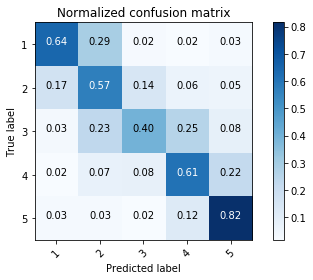

In [23]:

import matplotlib.pyplot as plt
import itertools
import numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## Bonus (merge similar classes to improve classification accuracy)
##### Print predicted and actual targets for some instances
##### Describe how the network fails, causing the low test and validation scores.
- The network clearly overfits the training data, the error rate on the training data is very low which means that the network memorizes the shape of the training data without the ability to generalize it to the validation or the test datasets.


##### modifications to the network
- Looking at the confusion matrix we find that classes 1,2 and classes 3,4 are misclassified about **25%** of the time.
- The idea is to merge these classes and train the network again using the same procedure.
- The cell below represents the required changes to the dataset.
- Rerun the code from the second cell in the notebook will generate better fscore.
- The test score increased by more than 18% => 0.786
- To train the modified model run first three code cells then run the cell below, afterwards you can proceed with the ordinary cell order to abtain an average f1score = 0.786.

In [25]:
#sample of the predictions vs the target values
print(mlp.predict(X_test_transformed)[:10])
print(y_test[:10])

[2 4 2 2 1 2 2 2 2 4]
[2 4 2 2 2 2 2 2 2 3]


In [ ]:
def merge_classes(x):
    if x ==1 or x == 2:
        return 1
    if x == 3 or x == 4:
        return 2
    else:
        return 3

data["overall"] = data["overall"].apply(merge_classes)

class_names = [1,2,3]